In [311]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/telecom-churn-data/internet_data.csv
/kaggle/input/telecom-churn-data/customer_data.csv
/kaggle/input/telecom-churn-data/Telecom Churn Data Dictionary.csv
/kaggle/input/telecom-churn-data/churn_data.csv


In [312]:
churn_data = pd.read_csv('/kaggle/input/telecom-churn-data/churn_data.csv')
customer_data = pd.read_csv('/kaggle/input/telecom-churn-data/customer_data.csv')
internet_data = pd.read_csv('/kaggle/input/telecom-churn-data/internet_data.csv')
##churn_dd_data = pd.read_csv('/kaggle/input/telecom-churn-data/Telecom Churn Data Dictionary.csv')

In [313]:
churn_data.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [314]:
customer_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


In [315]:
internet_data.head()

,customerID,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,No,Fiber optic,No,No,No,No,No,No


In [316]:
from warnings import filterwarnings
filterwarnings('ignore')

In [317]:
#Merging our data
pd.set_option('display.max_columns',None)
df_1 = pd.merge(churn_data,customer_data,on='customerID',how="inner")
df = pd.merge(df_1,internet_data,on='customerID',how="inner")
df.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Female,0,Yes,No,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No,Male,0,No,No,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Male,0,No,No,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Male,0,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Female,0,No,No,No,Fiber optic,No,No,No,No,No,No


In [318]:
df.shape

(7043, 21)

# Exploratory Data Analysis

In [319]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   tenure            7043 non-null   int64  
 2   PhoneService      7043 non-null   object 
 3   Contract          7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
 8   Churn             7043 non-null   object 
 9   gender            7043 non-null   object 
 10  SeniorCitizen     7043 non-null   int64  
 11  Partner           7043 non-null   object 
 12  Dependents        7043 non-null   object 
 13  MultipleLines     7043 non-null   object 
 14  InternetService   7043 non-null   object 
 15  OnlineSecurity    7043 non-null   object 
 16  OnlineBackup      7043 non-null   object 


In [320]:
# Convert TotalCharges to numeric datatype
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'],errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   tenure            7043 non-null   int64  
 2   PhoneService      7043 non-null   object 
 3   Contract          7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7032 non-null   float64
 8   Churn             7043 non-null   object 
 9   gender            7043 non-null   object 
 10  SeniorCitizen     7043 non-null   int64  
 11  Partner           7043 non-null   object 
 12  Dependents        7043 non-null   object 
 13  MultipleLines     7043 non-null   object 
 14  InternetService   7043 non-null   object 
 15  OnlineSecurity    7043 non-null   object 
 16  OnlineBackup      7043 non-null   object 


In [321]:
df.describe()

,tenure,MonthlyCharges,TotalCharges,SeniorCitizen
count,7043.000000,7043.000000,7032.000000,7043.000000
mean,32.371149,64.761692,2283.300441,0.162147
std,24.559481,30.090047,2266.771362,0.368612
min,0.000000,18.250000,18.800000,0.000000
25%,9.000000,35.500000,401.450000,0.000000
50%,29.000000,70.350000,1397.475000,0.000000
75%,55.000000,89.850000,3794.737500,0.000000
max,72.000000,118.750000,8684.800000,1.000000


In [322]:
df.SeniorCitizen.value_counts()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

In [323]:
percentiles = [0.25,0.5,0.75,0.9,0.95,0.99]
df.describe(percentiles=percentiles)

,tenure,MonthlyCharges,TotalCharges,SeniorCitizen
count,7043.000000,7043.000000,7032.000000,7043.000000
mean,32.371149,64.761692,2283.300441,0.162147
std,24.559481,30.090047,2266.771362,0.368612
min,0.000000,18.250000,18.800000,0.000000
25%,9.000000,35.500000,401.450000,0.000000
50%,29.000000,70.350000,1397.475000,0.000000
75%,55.000000,89.850000,3794.737500,0.000000
90%,69.000000,102.600000,5976.640000,1.000000
95%,72.000000,107.400000,6923.590000,1.000000
99%,72.000000,114.729000,8039.883000,1.000000


In [324]:
# Categorical values
df.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Female,0,Yes,No,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.50,No,Male,0,No,No,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Male,0,No,No,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Male,0,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Female,0,No,No,No,Fiber optic,No,No,No,No,No,No


In [325]:
#Drop the customerID column
#df.drop(axis=1,columns='customerID',inplace=True)
#df.columns

In [326]:
# Checking distinct values
df.PhoneService.value_counts()

Yes    6361
No      682
Name: PhoneService, dtype: int64

In [327]:
df.PaperlessBilling.value_counts()

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64

In [328]:
df.Churn.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [329]:
df.Partner.value_counts()

No     3641
Yes    3402
Name: Partner, dtype: int64

In [330]:
df.Dependents.value_counts()

No     4933
Yes    2110
Name: Dependents, dtype: int64

In [331]:
df.InternetService.value_counts()

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

In [332]:
df.OnlineSecurity.value_counts()

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64

In [333]:
cat_col = df.select_dtypes(include='object',exclude='float64').columns
print(cat_col)

Index(['customerID', 'PhoneService', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'Churn', 'gender', 'Partner', 'Dependents',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies'],
      dtype='object')


In [334]:
for col in cat_col:
    print('Categories of column: {}'.format(col))
    print(df[col].value_counts())
    print('\n')

Categories of column: customerID
7590-VHVEG    1
3791-LGQCY    1
6008-NAIXK    1
5956-YHHRX    1
5365-LLFYV    1
             ..
9796-MVYXX    1
2637-FKFSY    1
1552-AAGRX    1
4304-TSPVK    1
3186-AJIEK    1
Name: customerID, Length: 7043, dtype: int64


Categories of column: PhoneService
Yes    6361
No      682
Name: PhoneService, dtype: int64


Categories of column: Contract
Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64


Categories of column: PaperlessBilling
Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64


Categories of column: PaymentMethod
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64


Categories of column: Churn
No     5174
Yes    1869
Name: Churn, dtype: int64


Categories of column: gender
Male      3555
Female    3488
Name: gender, dtype: int64


Categories of column: Partner
No     3641

In [335]:
# Convert YES/No to 1/0 for specific columns
yes_no_collist = ['PhoneService','PaperlessBilling','Dependents','Partner','Churn']
df[yes_no_collist] = df[yes_no_collist].apply(lambda x:x.map({'Yes':1,"No":0}))
df.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,Female,0,1,0,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,1,One year,0,Mailed check,56.95,1889.50,0,Male,0,0,0,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,1,Month-to-month,1,Mailed check,53.85,108.15,1,Male,0,0,0,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,Male,0,0,0,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,1,Month-to-month,1,Electronic check,70.70,151.65,1,Female,0,0,0,No,Fiber optic,No,No,No,No,No,No


In [336]:
# One hot encoding for categorical columns (get_dummies)
dummy1 = pd.get_dummies(df[['Contract','PaymentMethod','gender','InternetService']],drop_first=True)
df = pd.concat([df,dummy1],axis=1)
df.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,InternetService_Fiber optic,InternetService_No
0,7590-VHVEG,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,Female,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,0,0,0,1,0,0,0,0
1,5575-GNVDE,34,1,One year,0,Mailed check,56.95,1889.50,0,Male,0,0,0,No,DSL,Yes,No,Yes,No,No,No,1,0,0,0,1,1,0,0
2,3668-QPYBK,2,1,Month-to-month,1,Mailed check,53.85,108.15,1,Male,0,0,0,No,DSL,Yes,Yes,No,No,No,No,0,0,0,0,1,1,0,0
3,7795-CFOCW,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,Male,0,0,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,1,0,0,0,0,1,0,0
4,9237-HQITU,2,1,Month-to-month,1,Electronic check,70.70,151.65,1,Female,0,0,0,No,Fiber optic,No,No,No,No,No,No,0,0,0,1,0,0,1,0


In [337]:
#Drop original columns
df.drop(columns=['Contract','PaymentMethod','gender','InternetService'],axis=1,inplace=True)
df.head()

,customerID,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,SeniorCitizen,Partner,Dependents,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,InternetService_Fiber optic,InternetService_No
0,7590-VHVEG,1,0,1,29.85,29.85,0,0,1,0,No phone service,No,Yes,No,No,No,No,0,0,0,1,0,0,0,0
1,5575-GNVDE,34,1,0,56.95,1889.50,0,0,0,0,No,Yes,No,Yes,No,No,No,1,0,0,0,1,1,0,0
2,3668-QPYBK,2,1,1,53.85,108.15,1,0,0,0,No,Yes,Yes,No,No,No,No,0,0,0,0,1,1,0,0
3,7795-CFOCW,45,0,0,42.30,1840.75,0,0,0,0,No phone service,Yes,No,Yes,Yes,No,No,1,0,0,0,0,1,0,0
4,9237-HQITU,2,1,1,70.70,151.65,1,0,0,0,No,No,No,No,No,No,No,0,0,0,1,0,0,1,0


In [338]:
#Creating dummy variables for remaining columns
dummy2 = pd.get_dummies(df[['MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']])
df = pd.concat([df,dummy2],axis=1)
df.head()

,customerID,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,SeniorCitizen,Partner,Dependents,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,InternetService_Fiber optic,InternetService_No,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes
0,7590-VHVEG,1,0,1,29.85,29.85,0,0,1,0,No phone service,No,Yes,No,No,No,No,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0
1,5575-GNVDE,34,1,0,56.95,1889.50,0,0,0,0,No,Yes,No,Yes,No,No,No,1,0,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0
2,3668-QPYBK,2,1,1,53.85,108.15,1,0,0,0,No,Yes,Yes,No,No,No,No,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0
3,7795-CFOCW,45,0,0,42.30,1840.75,0,0,0,0,No phone service,Yes,No,Yes,Yes,No,No,1,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0
4,9237-HQITU,2,1,1,70.70,151.65,1,0,0,0,No,No,No,No,No,No,No,0,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0


In [339]:
import re
pattern = re.compile(r'.*No internet service|.*No phone service')
dropcol=[]
for i in df.columns.to_list():
    if pattern.search(i):
        dropcol.append(i)
dropcol

['MultipleLines_No phone service',
 'OnlineSecurity_No internet service',
 'OnlineBackup_No internet service',
 'DeviceProtection_No internet service',
 'TechSupport_No internet service',
 'StreamingTV_No internet service',
 'StreamingMovies_No internet service']

In [340]:
df.drop(columns=dropcol,axis=1,inplace=True)
df.head()

,customerID,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,SeniorCitizen,Partner,Dependents,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,InternetService_Fiber optic,InternetService_No,MultipleLines_No,MultipleLines_Yes,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
0,7590-VHVEG,1,0,1,29.85,29.85,0,0,1,0,No phone service,No,Yes,No,No,No,No,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,1,0,1,0,1,0
1,5575-GNVDE,34,1,0,56.95,1889.50,0,0,0,0,No,Yes,No,Yes,No,No,No,1,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,0,1,0
2,3668-QPYBK,2,1,1,53.85,108.15,1,0,0,0,No,Yes,Yes,No,No,No,No,0,0,0,0,1,1,0,0,1,0,0,1,0,1,1,0,1,0,1,0,1,0
3,7795-CFOCW,45,0,0,42.30,1840.75,0,0,0,0,No phone service,Yes,No,Yes,Yes,No,No,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0,1,1,0,1,0
4,9237-HQITU,2,1,1,70.70,151.65,1,0,0,0,No,No,No,No,No,No,No,0,0,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0


In [341]:
#Drop Original columns
df.drop(columns = ['MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies'],axis=1,inplace=True)
print(df.shape)
df.head()

(7043, 32)


,customerID,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,SeniorCitizen,Partner,Dependents,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,InternetService_Fiber optic,InternetService_No,MultipleLines_No,MultipleLines_Yes,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
0,7590-VHVEG,1,0,1,29.85,29.85,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,1,0,1,0,1,0
1,5575-GNVDE,34,1,0,56.95,1889.50,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,0,1,0
2,3668-QPYBK,2,1,1,53.85,108.15,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,0,1,1,0,1,0,1,0,1,0
3,7795-CFOCW,45,0,0,42.30,1840.75,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0,1,1,0,1,0
4,9237-HQITU,2,1,1,70.70,151.65,1,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0


In [342]:
df.TotalCharges.isnull().sum()

11

In [343]:
df = df[~np.isnan(df['TotalCharges'])]
df.TotalCharges.isnull().sum()

0

# Completed EDA
# Now, we will split our data into train and test using sklearn train_test_split

In [344]:
#Our data is ready
from sklearn.model_selection import train_test_split
X = df.drop(columns=['Churn','customerID'],axis=1)
y = df['Churn']

In [345]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7,test_size=0.3,random_state=100)
print(X_train)
print(X_test)
print(y_train)
print(y_test)

      tenure  PhoneService  PaperlessBilling  MonthlyCharges  TotalCharges  \
879       33             1                 1           54.65       1665.20   
5790      40             0                 1           50.85       2036.55   
6498       1             1                 1           82.30         82.30   
880       10             1                 1          110.10       1043.30   
2784       4             1                 1           98.10        396.30   
...      ...           ...               ...             ...           ...   
79        45             1                 1           25.90       1216.60   
3934      10             0                 0           40.25        411.45   
5964      49             1                 0           61.75       3024.15   
6947      68             1                 1          101.05       6770.50   
5649      33             1                 0           20.05        669.45   

      SeniorCitizen  Partner  Dependents  Contract_One year  \


In [346]:
X_train

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,SeniorCitizen,Partner,Dependents,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,InternetService_Fiber optic,InternetService_No,MultipleLines_No,MultipleLines_Yes,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
879,33,1,1,54.65,1665.20,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,1,0,1,0,1,0,1,0
5790,40,0,1,50.85,2036.55,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,1,0,0,1,0,1
6498,1,1,1,82.30,82.30,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,1,0,1,1,0,1,0,1,0
880,10,1,1,110.10,1043.30,0,0,0,0,0,0,1,0,1,1,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1
2784,4,1,1,98.10,396.30,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,1,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,45,1,1,25.90,1216.60,0,1,1,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3934,10,0,0,40.25,411.45,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,1,1,0,0,1,1,0,1,0
5964,49,1,0,61.75,3024.15,0,1,1,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,1,1,0,1,0
6947,68,1,1,101.05,6770.50,0,1,1,1,0,1,0,0,1,1,0,0,1,1,0,0,1,1,0,1,0,0,1,0,1


In [347]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
#Standard scaler has no predetermined range, it assumes the data is normally distributed and sets mean=0 and S.D = 1
#Minmaxscaler gives 0 to 1 range only if column has only positive values. If there are negative values, then range is [-1,1]
scaler = StandardScaler()
X_train[['tenure','MonthlyCharges','TotalCharges']] = scaler.fit_transform(X_train[['tenure','MonthlyCharges','TotalCharges']])
X_train.head()

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,SeniorCitizen,Partner,Dependents,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,InternetService_Fiber optic,InternetService_No,MultipleLines_No,MultipleLines_Yes,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
879,0.019693,1,1,-0.338074,-0.276449,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,1,0,1,0,1,0,1,0
5790,0.305384,0,1,-0.464443,-0.112702,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,1,0,0,1,0,1
6498,-1.286319,1,1,0.581425,-0.974430,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,1,0,1,1,0,1,0,1,0
880,-0.919003,1,1,1.505913,-0.550676,0,0,0,0,0,0,1,0,1,1,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1
2784,-1.163880,1,1,1.106854,-0.835971,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,1,0,1,0,1,0,1


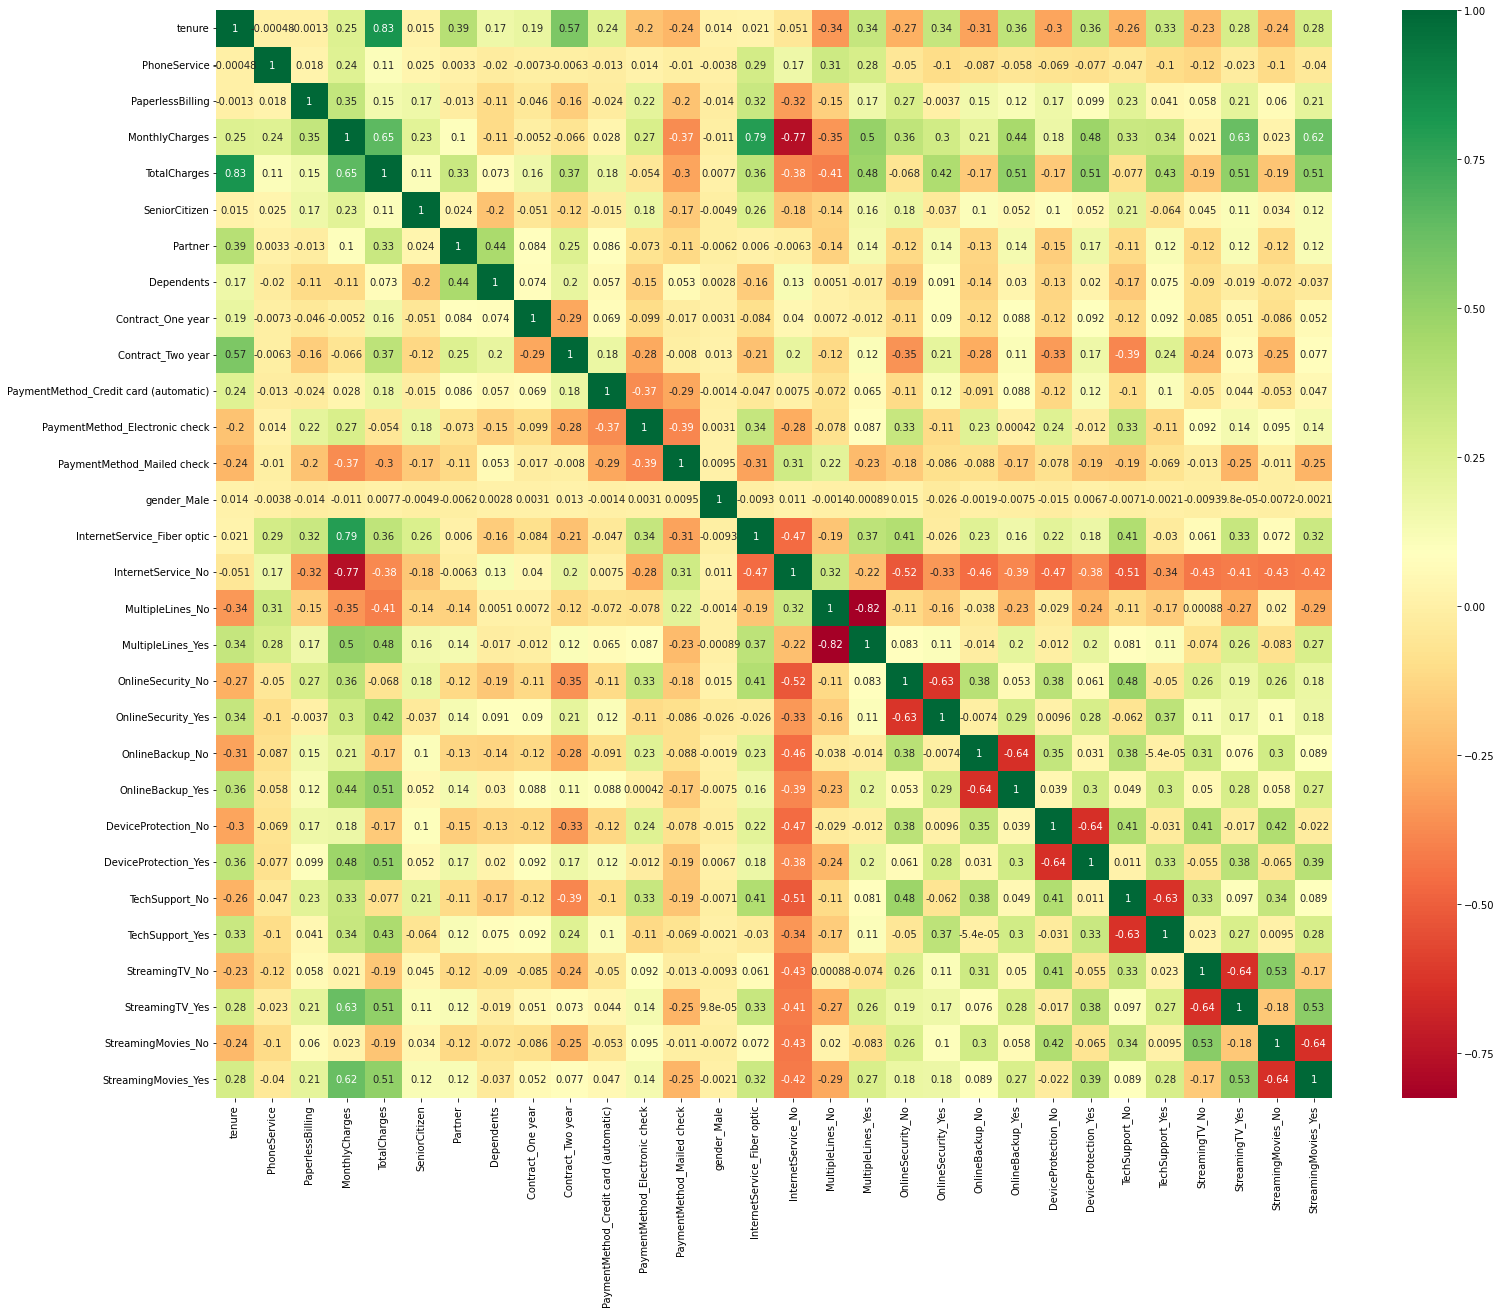

In [348]:
# Now we need to check for multicollinearity
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(25,20))
sns.heatmap(X_train.corr(),cmap='RdYlGn',annot=True)
plt.show()

In [349]:
# Drop the dummy variables which are correlated
X_test = X_test.drop(columns=['InternetService_No','OnlineSecurity_No','OnlineBackup_No','DeviceProtection_No',
                              'TechSupport_No','StreamingTV_No','StreamingMovies_No','MultipleLines_No'],axis=1)
X_train = X_train.drop(columns=['InternetService_No','OnlineSecurity_No','OnlineBackup_No','DeviceProtection_No',
                              'TechSupport_No','StreamingTV_No','StreamingMovies_No','MultipleLines_No'],axis=1)

In [350]:
X_train

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,SeniorCitizen,Partner,Dependents,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,InternetService_Fiber optic,MultipleLines_Yes,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes
879,0.019693,1,1,-0.338074,-0.276449,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0
5790,0.305384,0,1,-0.464443,-0.112702,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,1,1
6498,-1.286319,1,1,0.581425,-0.974430,0,0,0,0,0,0,1,0,0,1,0,0,1,1,0,0,0
880,-0.919003,1,1,1.505913,-0.550676,0,0,0,0,0,0,1,0,1,1,0,1,1,1,1,1,1
2784,-1.163880,1,1,1.106854,-0.835971,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,0.509448,1,1,-1.294154,-0.474260,0,1,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0
3934,-0.919003,0,0,-0.816946,-0.829291,0,0,1,1,0,0,0,1,0,0,0,1,1,0,1,0,0
5964,0.672699,1,0,-0.101964,0.322781,0,1,1,0,0,0,0,0,0,0,0,1,0,1,1,0,0
6947,1.448144,1,1,1.204956,1.974736,0,1,1,1,0,1,0,0,1,1,1,0,1,0,0,1,1


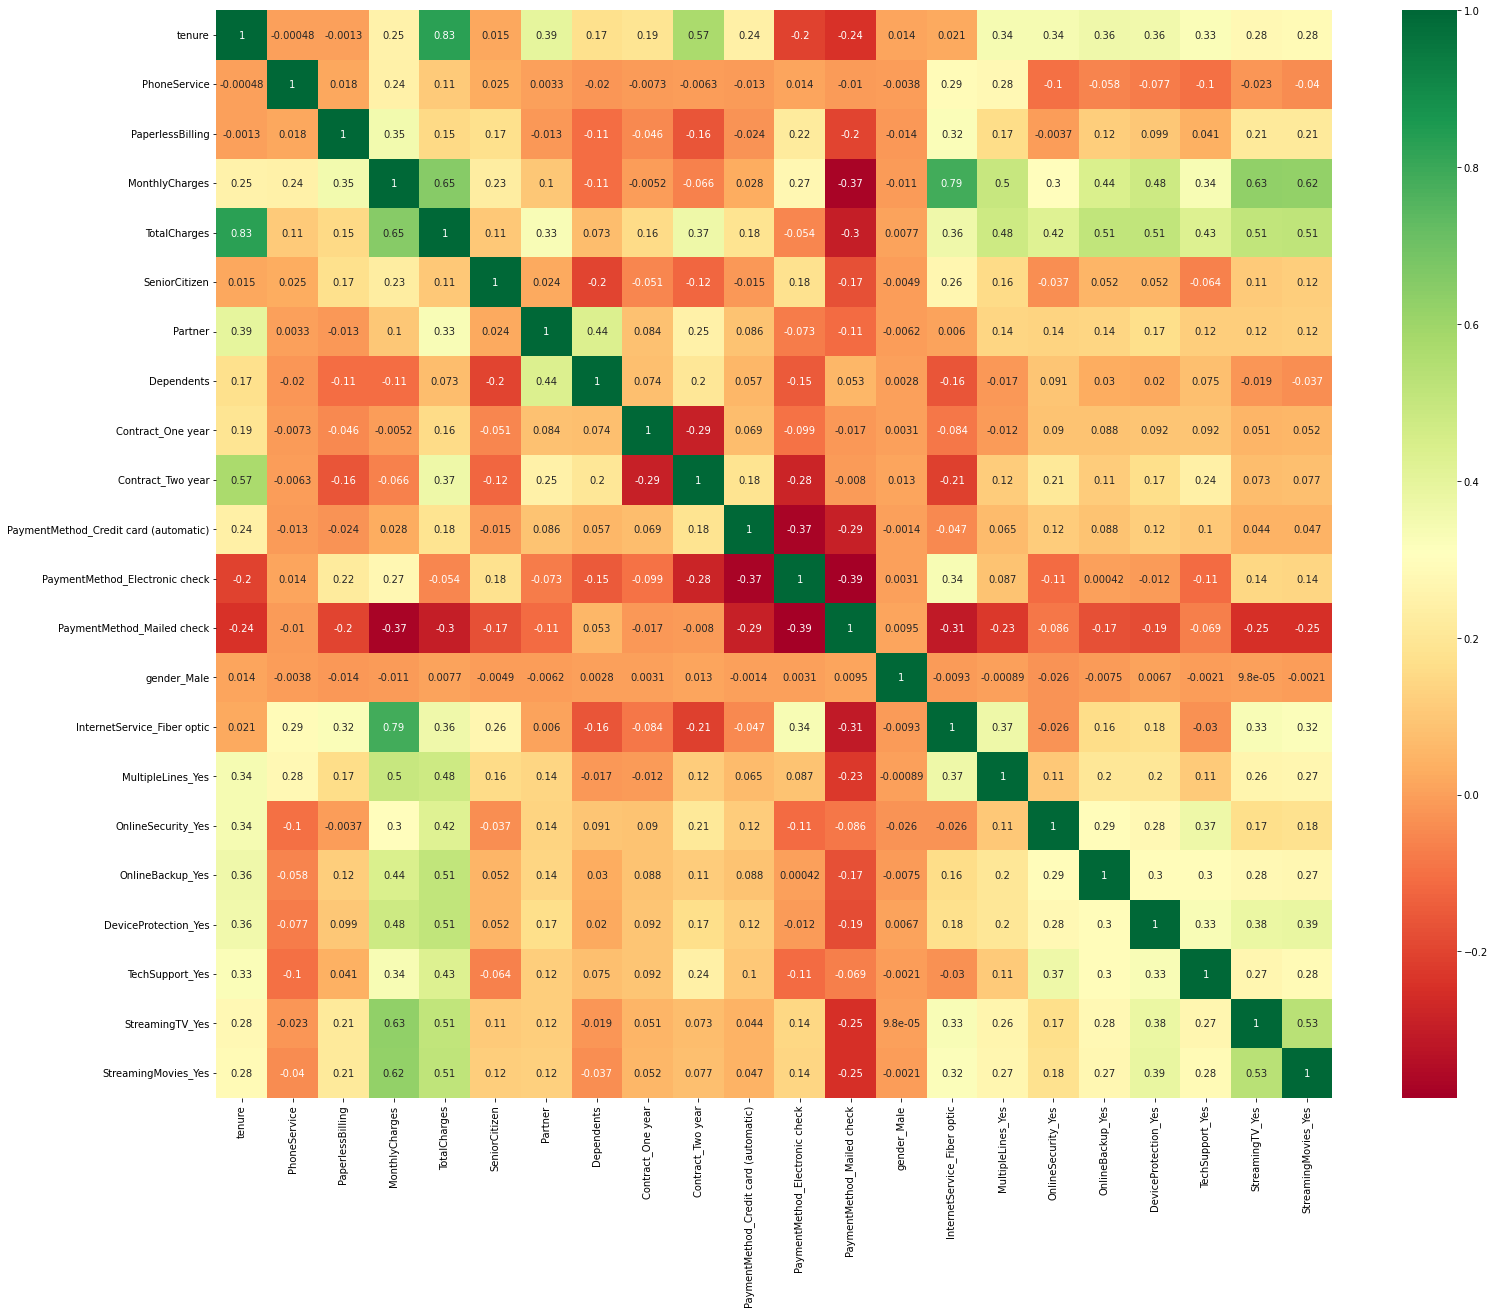

In [351]:
plt.figure(figsize=(25,20))
sns.heatmap(X_train.corr(),cmap='RdYlGn',annot=True)
plt.show()

# Model Building

In [352]:
import statsmodels.api as sm
X_train = sm.add_constant(X_train)
model = sm.GLM(y_train,X_train,family=sm.families.Binomial())
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4899
Model Family:                Binomial   Df Model:                           22
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2008.7
Date:                Sat, 15 Oct 2022   Deviance:                       4017.4
Time:                        08:26:34   Pearson chi2:                 6.08e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2832
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                     0.3208      0.351      0.915      0.360      -0.366       1.008
tenure                                   -1.4869      0.187     -7.941      0.000      -1.854      -1.120
PhoneService                             -1.2247      0.179     -6.856      0.000      -1.575      -0.875
PaperlessBilling                          0.3354      0.090      3.730      0.000       0.159       0.512
MonthlyCharges                            1.0540      0.197      5.338      0.000       0.667       1.441
TotalCharges                              0.6945      0.196      3.549      0.000       0.311       1.078
SeniorCitizen                             0.3920      0.101      3.863      0.000       0.193       0.591
Partner                                   0.0461      0.094      0.492      0.622      -0.137       0.229
Dependents                               -0.1506      0.107     -1.405      0.160      -0.361       0.059
Contract_One year                        -0.6737      0.129     -5.237      0.000      -0.926      -0.422
Contract_Two year                        -1.2535      0.212     -5.917      0.000      -1.669      -0.838
PaymentMethod_Credit card (automatic)    -0.2572      0.137     -1.882      0.060      -0.525       0.011
PaymentMethod_Electronic check            0.1645      0.113      1.461      0.144      -0.056       0.385
PaymentMethod_Mailed check               -0.2556      0.137     -1.862      0.063      -0.525       0.013
gender_Male                              -0.0355      0.078     -0.454      0.650      -0.189       0.118
InternetService_Fiber optic              -0.1439      0.229     -0.629      0.529      -0.592       0.304
MultipleLines_Yes                         0.0315      0.103      0.307      0.759      -0.170       0.233
OnlineSecurity_Yes                       -0.5479      0.113     -4.859      0.000      -0.769      -0.327
OnlineBackup_Yes                         -0.3519      0.102     -3.456      0.001      -0.551      -0.152
DeviceProtection_Yes                     -0.2113      0.103     -2.046      0.041      -0.414      -0.009
TechSupport_Yes                          -0.5554      0.112     -4.946      0.000      -0.776      -0.335
StreamingTV_Yes                          -0.1072      0.121     -0.889      0.374      -0.343       0.129
StreamingMovies_Yes                      -0.2185      0.120     -1.816      0.069      -0.454       0.017
=========================================================================================================
"""

In [353]:
# RFE feature elimination
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
rfe = RFE(logreg,step=1,verbose=1)
rfe.fit(X_train,y_train)
rfe.support_

Fitting estimator with 23 features.
Fitting estimator with 22 features.
Fitting estimator with 21 features.
Fitting estimator with 20 features.
Fitting estimator with 19 features.
Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 features.
Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.


array([False,  True,  True, False,  True,  True,  True, False, False,
        True,  True,  True, False,  True, False, False, False,  True,
       False, False,  True, False, False])

In [354]:
col = X_train.columns[rfe.support_]
col

Index(['tenure', 'PhoneService', 'MonthlyCharges', 'TotalCharges',
       'SeniorCitizen', 'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Mailed check',
       'OnlineSecurity_Yes', 'TechSupport_Yes'],
      dtype='object')

In [355]:
#Columns which are not relevant by RFE
X_train.columns[~rfe.support_]

Index(['const', 'PaperlessBilling', 'Partner', 'Dependents',
       'PaymentMethod_Electronic check', 'gender_Male',
       'InternetService_Fiber optic', 'MultipleLines_Yes', 'OnlineBackup_Yes',
       'DeviceProtection_Yes', 'StreamingTV_Yes', 'StreamingMovies_Yes'],
      dtype='object')

In [356]:
#Re-assess the model with new columns col
#New sm constant for each model
X_train_sm = sm.add_constant(X_train[col])
model2 = sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
result2 = model2.fit()
result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4910
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2028.5
Date:                Sat, 15 Oct 2022   Deviance:                       4057.1
Time:                        08:26:34   Pearson chi2:                 5.98e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2774
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                     0.1082      0.150      0.721      0.471      -0.186       0.402
tenure                                   -1.4467      0.182     -7.945      0.000      -1.804      -1.090
PhoneService                             -1.0150      0.151     -6.735      0.000      -1.310      -0.720
MonthlyCharges                            0.8764      0.075     11.708      0.000       0.730       1.023
TotalCharges                              0.5694      0.189      3.020      0.003       0.200       0.939
SeniorCitizen                             0.4729      0.099      4.780      0.000       0.279       0.667
Contract_One year                        -0.7991      0.125     -6.378      0.000      -1.045      -0.554
Contract_Two year                        -1.4159      0.208     -6.800      0.000      -1.824      -1.008
PaymentMethod_Credit card (automatic)    -0.3933      0.112     -3.501      0.000      -0.614      -0.173
PaymentMethod_Mailed check               -0.4200      0.110     -3.814      0.000      -0.636      -0.204
OnlineSecurity_Yes                       -0.5438      0.101     -5.404      0.000      -0.741      -0.347
TechSupport_Yes                          -0.5598      0.101     -5.560      0.000      -0.757      -0.362
=========================================================================================================
"""

In [357]:
#Getting the predicted values
y_train_pred = result2.predict(X_train_sm)
y_train_pred

879     0.199567
5790    0.309001
6498    0.712738
880     0.580610
2784    0.670651
          ...   
79      0.014196
3934    0.111733
5964    0.052696
6947    0.117759
5649    0.044473
Length: 4922, dtype: float64

In [359]:
#Create a new dataframe with actual churn flag and predicted probabilties
y_train_pred_final = pd.DataFrame({'Churn':y_train.values,'Predicted Churn Prob.':y_train_pred})
y_train_pred_final['CustID'] = y_train.index
y_train_pred_final.head()

,Churn,Predicted Churn Prob.,CustID
879,0,0.199567,879
5790,0,0.309001,5790
6498,1,0.712738,6498
880,1,0.580610,880
2784,1,0.670651,2784


In [360]:
#Create a new column for Predicted Churn, 1 if churn_prob >0.5 else 0
y_train_pred_final['Predicted Churn'] = y_train_pred_final['Predicted Churn Prob.'].apply(lambda x: 1 if x>0.5 else 0)
y_train_pred_final.head()

,Churn,Predicted Churn Prob.,CustID,Predicted Churn
879,0,0.199567,879,0
5790,0,0.309001,5790,0
6498,1,0.712738,6498,1
880,1,0.580610,880,1
2784,1,0.670651,2784,1


In [361]:
# Evaluation Metrics
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_train_pred_final['Churn'],y_train_pred_final['Predicted Churn'])
print(confusion)

[[3269  366]
 [ 605  682]]


In [362]:
# Predicted     not_churn   churn
# Actual
# not_churn        3269(TN)  366(FP)
# churn            605(FN)   682(TP)

In [363]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_train_pred_final['Churn'],y_train_pred_final['Predicted Churn']))

0.8027224705404307


# FUTURE NOTES

In [364]:
# 1.What we did so far -  RFE - removed some features - used sm.GLM() to make logistic regression model,
#  we saw all p-values are less and features are significant - we proceed with these features - now, we get the predicted y_TRAIN_pred (TRAIN DATA) values
# 2. We make a new dataframe, add Actual Churn v/s Predicted Prob.
# 3. We make new column Pred.Churn
# 4. Now we got our matrix, we import sklearn.metrics import confusion_matrix
# 5. We find the confusion = confusion_matrix(y_true,y_pred)
# 6. We got the accuracy for our TRAINING DATA


# Now, what we need to do further
# 1. So after we get our accuracy (with significant features using RFE) for TRAINING DATA, we will check multicollinearity using Manual Feature Elimination (VIFs).
# 2. from statsmodels.stats.outliers_influence import variance_inflation_factor
# 3. So we get VIFs for each feature and check if VIF(i)>5. Drop 1 by 1 until we get all features VIF less than 5. (This involves lot of model iterations)
# 4. We got all features less than 5 VIF and significant features.
# NOTE: WE GOT THE FINAL PROBABILITIES, WE ONLY NOW, NEED TO FIND THE OPTIMAL THRESHOLD SO THAT WE CAN GET OUR PREDICTED TRAINING DATA OUTPUT.

# 5. Now we get confusion matrix, and we get TP, TN, FP, FN and calculate all metrics.
# 6. Plot the ROC curve
# 7. Find the optimal ROC threshold by:
        # A. Calculating predicted value for diff. cut offs
        # B. Calculating accuracy, sensitivity, specificity for each cut off
        # C. Find the optimal threshold among all the cut offs. There should be trade-off between all the 3.
# 8. Now we use the optimal threshold for finding the final_predicted for TRAINING DATA.
# 9. Check the accuracy, confusion matrix, all other metrics
# 10. Now, we check for Precision-Recall trade-off.
# 11. from sklearn.metrics import precision_score, recall_score
# 12. from sklearn.metrics import precision_recall_curve
# 13. We took the optimal threshold using precision-recall trade-off for THIS PARTICULAR CASE STUDY.
# 14. Finally, we are ready with our trained Logistic Regression Model.


# NOW, WE WILL USE THE TRAINED MODEL ON TEST DATA
# 1. We first scale our test data.
# 2. Make predictions using the latest model (optimal model)
# 3. Make a new dataframe with actual Churn v/s PREDICTED TEST DATA CHURN USING OPTIMAL CUTOFF/THRESHOLD.
# 4. Now we make the final confusion matrix and calculate our FINAL TEST DATA PREDICTIONS AND EVALUATIONS.
# THE END!!
# CONGRATULATIONS!!
